# DataViz: séries temporelles

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/raw/weatherAUS.csv')
df.head(2)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   

   RainTomorrow  
0            No  
1            No  

[2 rows x 23 columns]

## Premiers pas: tracer une courbe d'une donnée moyennée sur un mois.

In [2]:
Cairns = df.loc[df['Location'] == 'Cairns'].copy()
Cairns['Date'] = pd.to_datetime(Cairns['Date'])
Cairns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 87200 to 90239
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3040 non-null   datetime64[ns]
 1   Location       3040 non-null   object        
 2   MinTemp        3039 non-null   float64       
 3   MaxTemp        3040 non-null   float64       
 4   Rainfall       2988 non-null   float64       
 5   Evaporation    2670 non-null   float64       
 6   Sunshine       2564 non-null   float64       
 7   WindGustDir    3021 non-null   object        
 8   WindGustSpeed  3022 non-null   float64       
 9   WindDir9am     2997 non-null   object        
 10  WindDir3pm     3036 non-null   object        
 11  WindSpeed9am   3039 non-null   float64       
 12  WindSpeed3pm   3039 non-null   float64       
 13  Humidity9am    3039 non-null   float64       
 14  Humidity3pm    3040 non-null   float64       
 15  Pressure9am    3039 n

In [3]:
# Test d'un simple groupby:
test_gby = Cairns.groupby([Cairns['RainToday'], Cairns['RainTomorrow']]).agg({'MaxTemp':'mean'})
test_gby.head()
# Ca marche.

MaxTemp
RainToday RainTomorrow           
No        No            29.407319
          Yes           30.241854
Yes       No            30.002486
          Yes           29.173230

In [4]:
# Après quelques essais infructueux de groupby sur le df entier par date qui ne fonctionnent pas,
# j'émet l'hypothèse que cela ne fonctionne pas à cause de l'hétérogénéité des plages de dates entre les différentes stations.
# Je décide ici de travailler sur un subset lié à une station pour avoir une plage unique de date, sur la station Canberra.
# Nouvelle hypothèse: ça ne marche pas plus bas peut être parce que Canberra['MaxTemp'] contient des nan?
# Après avoir cherché une autre station grâce à la heatmap des nan, je décide de travailler sur la station Cairns, qui n'en contient pas pour la colonne 'MaxTemp'.
# Bilan: ça ne marche pas plus...

# Définir Canberra par  Canberra = df.loc[df['Location'] == 'Canberra'] pose un 'SettingWithCopyWarning'
# quand on essaye de changer le format de la colonne 'Date' sur le df Canberra avec l'entrée : Canberra['Date'] = pd.to_datetime(Canberra['Date'])
# En utilisant l'entrée pd.to_datetime(Canberra['Date']), ça marche.
# C'est étonnant sachant que pour appliquer pd.to_datetime() au df entier, il faut faire l'inverse:
# pd.to_datetime(df['Date']) ne fonctionne pas
# Alors que faire la réaffectation via l'entrée df['Date'] = pd.to_datetime(df['Date']) fonctionne. Mystère...

# A essayer: Cairns = df.loc[df['Location'] == 'Cairns'].copy() avec la méthode .copy() à la fin
# Bilan : du point de vue de mon objectif (faire un groupby year), ça ne marche pas plus. le problème doit venir d'ailleurs.
# En revanche, travailler avec un .copy() permet d'éviter le 'SettingWithCopyWarning' quand on change le type de la colonne 'Date' avec pd.to_datetime. On avance...

In [5]:
#pd.to_datetime(Canberra['Date']) ###### !!!! Il faut réaffecter pour que la conversion marche.
                                 ##### (1) Apparemment pas quand on travaille sur une copie issue de .loc[].

In [6]:
grouper_month = pd.Grouper(key = 'Date', freq = 'm') # HYPER IMPORTANT: ca résoud mon problème:

# J'écrivais "grouper_year = pd.Grouper(key = Cairns['Date'], freq = 'Y')"
# pensant que je devais spécifier le dataframe sur lequel on travaille. En fait, c'est inutile.
# J'imagine que pd.Grouper est un genre d'instanciation de truc, qui fonctionnera effectivement quand on l'appellera dans un groupby, qui lui spécifie le df sur lequel on travaille.

groupby_month_temp = Cairns.groupby(grouper_month).agg({'MaxTemp':'mean'})
groupby_month_temp.head(60)

MaxTemp
Date                 
2008-12-31  32.606452
2009-01-31  30.909677
2009-02-28  31.178571
2009-03-31  31.374194
2009-04-30  30.653333
2009-05-31  27.300000
2009-06-30  27.603333
2009-07-31  27.025806
2009-08-31  28.325806
2009-09-30  29.953333
2009-10-31  30.235484
2009-11-30  29.913333
2009-12-31  31.732258
2010-01-31  31.090323
2010-02-28  32.228571
2010-03-31  31.003226
2010-04-30  28.973333
2010-05-31  28.409677
2010-06-30  27.796667
2010-07-31  27.509677
2010-08-31  27.974194
2010-09-30  29.910000
2010-10-31  29.687097
2010-11-30  30.543333
2010-12-31  31.674194
2011-01-31  31.212903
2011-02-28  30.560714
2011-03-31  30.664516
2011-04-30        NaN
2011-05-31  27.996774
2011-06-30  26.133333
2011-07-31  26.041935
2011-08-31  27.280645
2011-09-30  27.960000
2011-10-31  29.751613
2011-11-30  30.853333
2011-12-31  31.935484
2012-01-31  31.493548
2012-02-29  31.934483
2012-03-31  30.167742
2012-04-30  29.690000
2012-05-31  27.445161
2012-06-30  25.976667
2012-07-31  25.777419
2012-08-31  27.219355
2012-09-30  28.896667
2012-10-31  29.877419
2012-11-30  31.266667
2012-12-31        NaN
2013-01-31  32.677419
2013-02-28        NaN
2013-03-31  30.829032
2013-04-30  29.416667
2013-05-31  27.600000
2013-06-30  26.933333
2013-07-31  26.416129
2013-08-31  27.887097
2013-09-30  28.546667
2013-10-31  30.567742
2013-11-30  30.546667

In [7]:
plt.figure(figsize= (10,5))
groupby_month_temp.plot()
plt.ylabel('Moyenne mensuelle de MaxTemp en °C')
plt.title('Moyenne mensuelle de MaxTemp pour la station Cairns')
plt.show()
# Bizarre: il a des trous, et on voit dans le tableau que cela crée des nan.
# J'en déduis que parfois, il y a des périodes où la station ne mesure pas de données.
# Elles n'apparaissent pas dans le tableau car il n'y a pas de nan dans Date,
# mais elles laissent un trou chronologique qui apparait dans les représentations graphiques. Ici en avril 2011 et en décembre 2012.
# D'où une nouvelle question: est-ce grave/important? si oui, comment détecter ces "trous chronologiques?"

<Figure size 1000x500 with 0 Axes>

## Exploration de courbes...

In [8]:
# Ok, qu'est-ce qu'on pourrait bien avoir envie de voir?
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

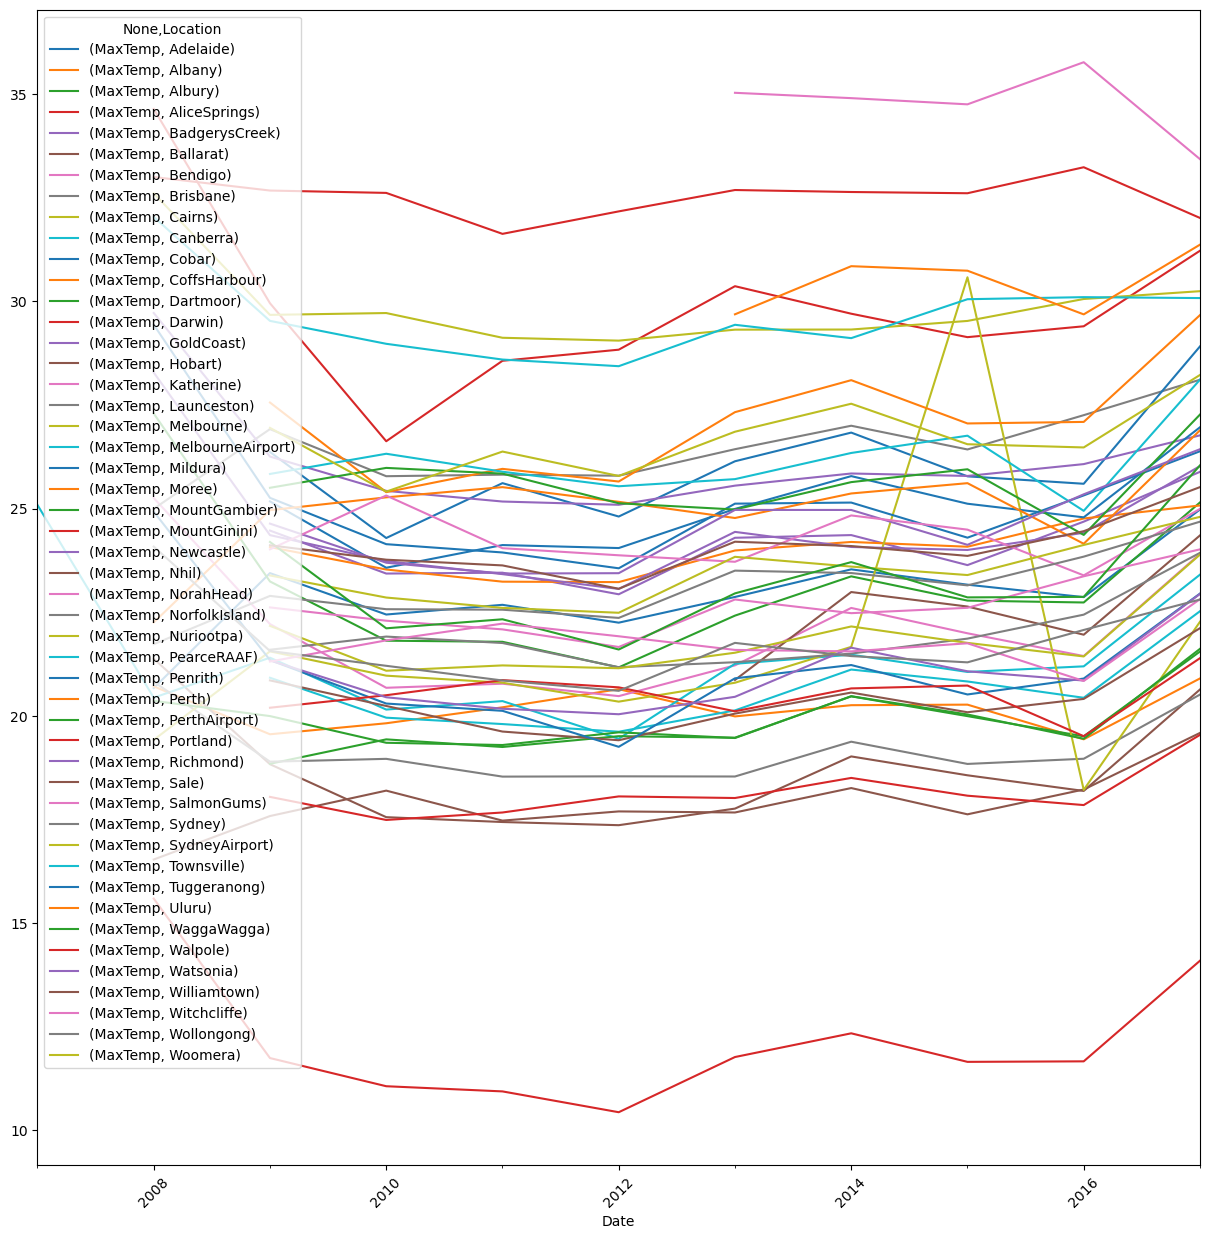

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
tableau = df.groupby([pd.Grouper(key = 'Date', freq = 'Y'), df['Location']]).agg({'MaxTemp':'mean'}).unstack() # .unstack() est important ici pour afficher une courbe par station
tableau.plot(figsize=(15, 15))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()
# C'est assez illisible, mais on voit quand même une bizarrerie : un pic sur une courbe verdâtre en 2015, contrairement aux autres stations. Pourquoi?
# De plus, les températures max moyennes par an sont très élèvées en 2008. Pb de données ou phénomène physique réel?
# http://www.bom.gov.au/climate/current/annual/aus/2008/
# On y apprend que l'année 2008 a été la 14eme année la plus chaude enregistrée en Australie.

In [10]:
tableau = df.groupby([pd.Grouper(key = 'Date', freq = 'M'), df['Location']]).agg({'MaxTemp':'mean'}).unstack() # .unstack() est important ici pour afficher une courbe par station
tableau.plot(figsize=(15, 15))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

## Analyse des dates:

In [11]:
# Brouillon pour la station Cairns:

print("Pour la station Cairns:")
print("Première date enregistrée:", Cairns['Date'].dt.date.min())
print("Dernière date enregistrée:", Cairns['Date'].dt.date.max())
print("Nombre de dates mesurées:", len(Cairns['Date']))
delta_t = Cairns['Date'].dt.date.max()-Cairns['Date'].dt.date.min()
print("Nombre total de jours entre le début et la fin:", delta_t.days)
print("Il manque donc", delta_t.days-len(Cairns['Date']), "jours pour cette station.")

Pour la station Cairns:
Première date enregistrée: 2008-12-01
Dernière date enregistrée: 2017-06-25
Nombre de dates mesurées: 3040
Nombre total de jours entre le début et la fin: 3128
Il manque donc 88 jours pour cette station.


In [13]:
# Mise au propre :création d'une fonction dédiée qui fournit le rapport précédant en spécifiant la station:
# Reset du df au cas où:
df = pd.read_csv("../../data/raw/weatherAUS.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Fonction :
def rapport_jours_manqués(station):
    print("Pour la station", station, ":")
    lieu = df.loc[df['Location'] == station]
    print("Première date enregistrée:", lieu['Date'].dt.date.min())
    print("Dernière date enregistrée:", lieu['Date'].dt.date.max())
    print("Nombre de dates mesurées:", len(lieu['Date']))
    delta_t = lieu['Date'].dt.date.max()-lieu['Date'].dt.date.min()
    print("Nombre total de jours entre le début et la fin:", delta_t.days)
    print("Il manque donc", delta_t.days-len(lieu['Date']), "jours pour la station", station, ".")
    print("-----------------------------------------------------------------------")

# exemple:
rapport_jours_manqués('Sydney')

Pour la station Sydney :
Première date enregistrée: 2008-02-01
Dernière date enregistrée: 2017-06-25
Nombre de dates mesurées: 3344
Nombre total de jours entre le début et la fin: 3432
Il manque donc 88 jours pour la station Sydney .
-----------------------------------------------------------------------


In [14]:
# Création d'une fonction renvoyant uniquement le nombre de jours manqués par station:
def nb_jours_manqués(station):
    jm = (df.loc[df['Location'] == station]['Date'].dt.date.max()-df.loc[df['Location'] == station]['Date'].dt.date.min()).days - len(df.loc[df['Location'] == station]['Date'])
    return jm

# Exemple:
nb_jours_manqués('NorahHead')

93

In [16]:
# Encore une autre fonction: l'objectif est de remplir un df avec les données du rapport.
df = pd.read_csv("../../data/raw/weatherAUS.csv")
df['Date'] = pd.to_datetime(df['Date'])

def données_dates(station):
    lieu = df.loc[df['Location'] == station]
    date_min = lieu['Date'].dt.date.min()
    date_max = lieu['Date'].dt.date.max()
    n_mes = len(lieu['Date'])
    period = date_max - date_min
    n_missed = period.days - n_mes
    print("Il manque", n_missed, "jours pour la station", station, ".") # j'aoute le message pour avoir un aperçu global.

for station in df['Location'].unique():   # j'avais oublié le ".unique()" au début, et je croyais que la boucle tournait sans fin, alors qu'elle affichait une ligne par ligne de df (145 k donc...)
    données_dates(str(station))

Il manque 88 jours pour la station Albury .
Il manque 88 jours pour la station BadgerysCreek .
Il manque 88 jours pour la station Cobar .
Il manque 88 jours pour la station CoffsHarbour .
Il manque 88 jours pour la station Moree .
Il manque 88 jours pour la station Newcastle .
Il manque 93 jours pour la station NorahHead .
Il manque 88 jours pour la station NorfolkIsland .
Il manque 89 jours pour la station Penrith .
Il manque 88 jours pour la station Richmond .
Il manque 88 jours pour la station Sydney .
Il manque 88 jours pour la station SydneyAirport .
Il manque 88 jours pour la station WaggaWagga .
Il manque 88 jours pour la station Williamtown .
Il manque 88 jours pour la station Wollongong .
Il manque 88 jours pour la station Canberra .
Il manque 89 jours pour la station Tuggeranong .
Il manque 88 jours pour la station MountGinini .
Il manque 88 jours pour la station Ballarat .
Il manque 88 jours pour la station Bendigo .
Il manque 88 jours pour la station Sale .
Il manque 88 jou

In [17]:
dict_dates = {"endroit" : [],
             "date_debut" : [],
             "date_fin" : [],
             "n_jours_tot": [],
             "n_jours_mes": [],
             "n_jours_miss": []}
keys = ["endroit", "date_debut", "date_fin", "n_jours_tot", "n_jours_mes","n_jours_miss"]

for station in df['Location'].unique():
    values = []
    lieu = df.loc[df['Location'] == station]
    date_min = lieu['Date'].dt.date.min()
    date_max = lieu['Date'].dt.date.max()
    n_mes = len(lieu['Date'])
    period = date_max - date_min
    n_missed = period.days - n_mes
    values = [str(station), date_min, date_max, period, n_mes, n_missed]

    for j, key in enumerate(keys):
        dict_dates[key].append(values[j])
df_dates = pd.DataFrame.from_dict(dict_dates)
df_dates.head(49)

endroit  date_debut    date_fin n_jours_tot  n_jours_mes  \
0             Albury  2008-12-01  2017-06-25   3128 days         3040   
1      BadgerysCreek  2009-01-01  2017-06-25   3097 days         3009   
2              Cobar  2009-01-01  2017-06-25   3097 days         3009   
3       CoffsHarbour  2009-01-01  2017-06-25   3097 days         3009   
4              Moree  2009-01-01  2017-06-25   3097 days         3009   
5          Newcastle  2008-12-01  2017-06-24   3127 days         3039   
6          NorahHead  2009-01-01  2017-06-25   3097 days         3004   
7      NorfolkIsland  2009-01-01  2017-06-25   3097 days         3009   
8            Penrith  2008-12-01  2017-06-25   3128 days         3039   
9           Richmond  2009-01-01  2017-06-25   3097 days         3009   
10            Sydney  2008-02-01  2017-06-25   3432 days         3344   
11     SydneyAirport  2009-01-01  2017-06-25   3097 days         3009   
12        WaggaWagga  2009-01-01  2017-06-25   3097 days         3009   
13       Williamtown  2009-01-01  2017-06-25   3097 days         3009   
14        Wollongong  2008-12-01  2017-06-25   3128 days         3040   
15          Canberra  2007-11-01  2017-06-25   3524 days         3436   
16       Tuggeranong  2008-12-01  2017-06-25   3128 days         3039   
17       MountGinini  2008-12-01  2017-06-25   3128 days         3040   
18          Ballarat  2008-12-01  2017-06-25   3128 days         3040   
19           Bendigo  2008-12-01  2017-06-25   3128 days         3040   
20              Sale  2009-01-01  2017-06-25   3097 days         3009   
21  MelbourneAirport  2009-01-01  2017-06-25   3097 days         3009   
22         Melbourne  2008-07-01  2017-06-25   3281 days         3193   
23           Mildura  2009-01-01  2017-06-25   3097 days         3009   
24              Nhil  2013-03-01  2017-06-25   1577 days         1578   
25          Portland  2009-01-01  2017-06-25   3097 days         3009   
26          Watsonia  2009-01-01  2017-06-25   3097 days         3009   
27          Dartmoor  2009-01-01  2017-06-25   3097 days         3009   
28          Brisbane  2008-07-01  2017-06-25   3281 days         3193   
29            Cairns  2008-12-01  2017-06-25   3128 days         3040   
30         GoldCoast  2008-12-01  2017-06-25   3128 days         3040   
31        Townsville  2008-12-01  2017-06-25   3128 days         3040   
32          Adelaide  2008-07-01  2017-06-25   3281 days         3193   
33      MountGambier  2008-12-01  2017-06-25   3128 days         3040   
34         Nuriootpa  2009-01-01  2017-06-25   3097 days         3009   
35           Woomera  2009-01-01  2017-06-25   3097 days         3009   
36            Albany  2008-12-01  2017-06-25   3128 days         3040   
37       Witchcliffe  2009-01-01  2017-06-25   3097 days         3009   
38        PearceRAAF  2009-01-01  2017-06-25   3097 days         3009   
39      PerthAirport  2009-01-01  2017-06-25   3097 days         3009   
40             Perth  2008-07-01  2017-06-25   3281 days         3193   
41        SalmonGums  2009-01-01  2017-06-25   3097 days         3001   
42           Walpole  2009-01-01  2017-06-25   3097 days         3006   
43            Hobart  2008-07-01  2017-06-25   3281 days         3193   
44        Launceston  2008-12-01  2017-06-25   3128 days         3040   
45      AliceSprings  2008-12-01  2017-06-25   3128 days         3040   
46            Darwin  2008-07-01  2017-06-25   3281 days         3193   
47         Katherine  2013-03-01  2017-06-25   1577 days         1578   
48             Uluru  2013-03-01  2017-06-25   1577 days         1578   

    n_jours_miss  
0             88  
1             88  
2             88  
3             88  
4             88  
5             88  
6             93  
7             88  
8             89  
9             88  
10            88  
11            88  
12            88  
13            88  
14            88  
15            88  
16            89  
17            88  
1

In [18]:
df_dates['date_debut'].unique()
# Il n 'y a que 6 dates de début différentes pour les 49 stations.

array([datetime.date(2008, 12, 1), datetime.date(2009, 1, 1),
       datetime.date(2008, 2, 1), datetime.date(2007, 11, 1),
       datetime.date(2008, 7, 1), datetime.date(2013, 3, 1)], dtype=object)

In [19]:
df_dates['date_fin'].unique()
# Il n'y a que deux dates de fin différentes, le 24 et le 25 juin 2017.

array([datetime.date(2017, 6, 25), datetime.date(2017, 6, 24)],
      dtype=object)

In [20]:
# Pourquoi y at-t-il presque toujours le même nombre de dates manquantes? 88 environ? Jours fériés? autres?
# Quel est la répartition de ces dates?

## Recherche autour des trous chronologiques

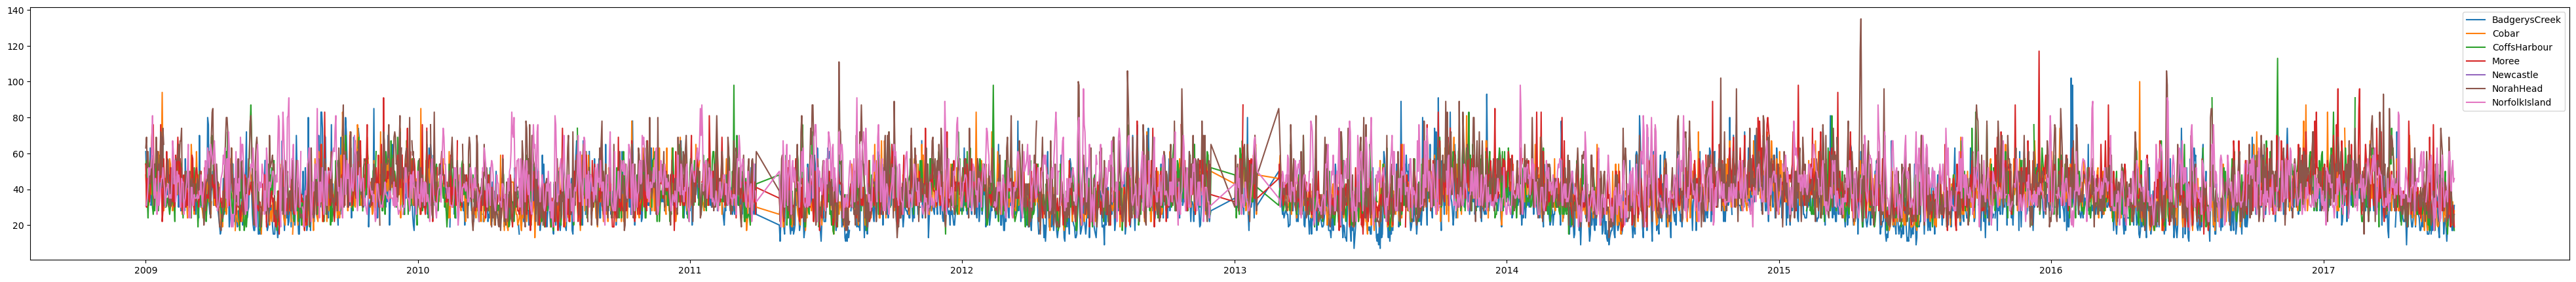

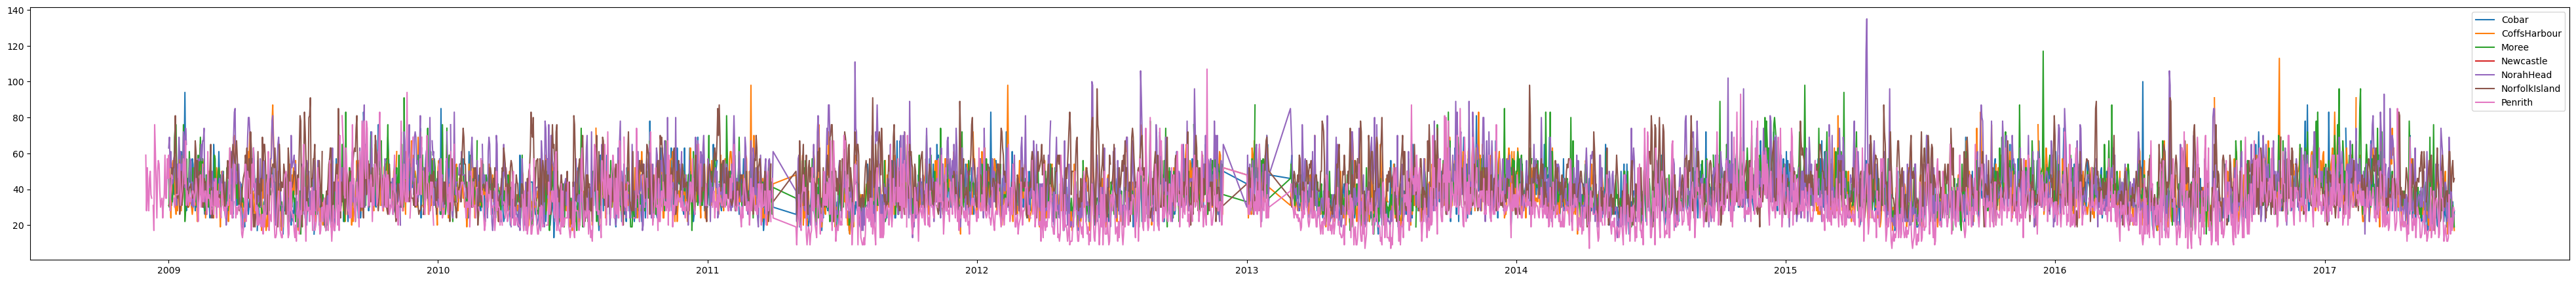

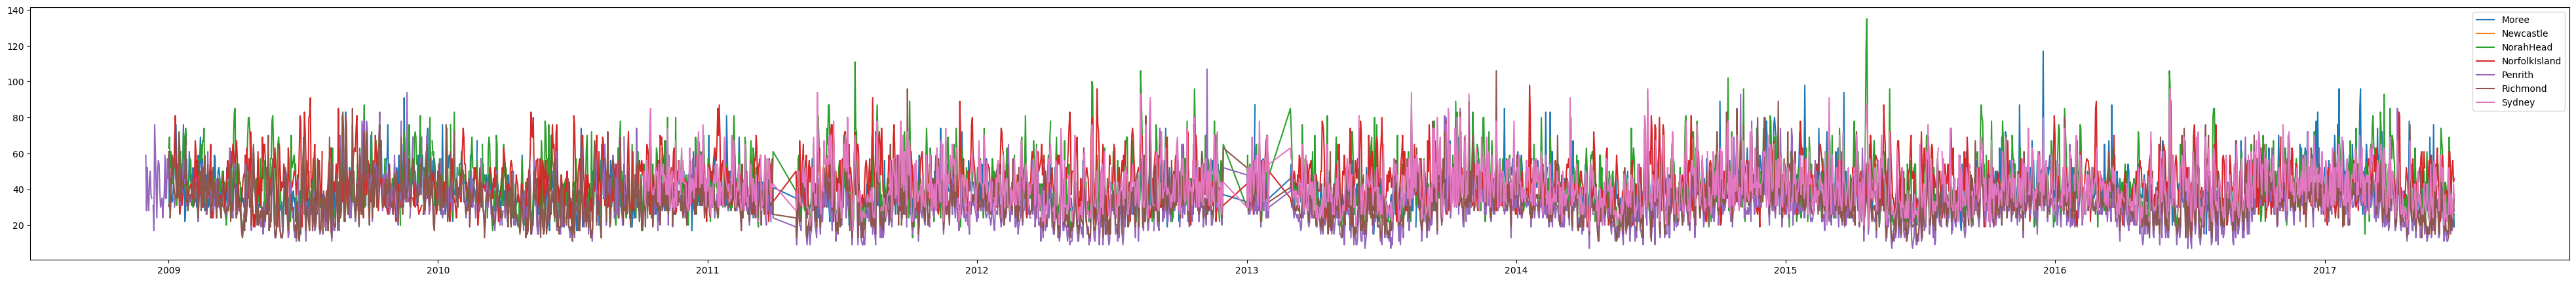

In [21]:

# Superposons 7 stations par graphique dans 7 graphiques différents :
for i in range(7):
    plt.figure(figsize = (50, 5))
    for station in df['Location'].unique()[i:(i+7)]:
        plt.plot(df.loc[df['Location'] == station]['Date'], df.loc[df['Location'] == station]['WindGustSpeed'], label = station)
    plt.legend()
    plt.show()

On voit bien que les trous sont aux mêmes endroits pour toutes les stations.  
On note trois périodes différentes d'interruption:  
    1. en 2011  
    2. fin 2012  
    3. début 2013  

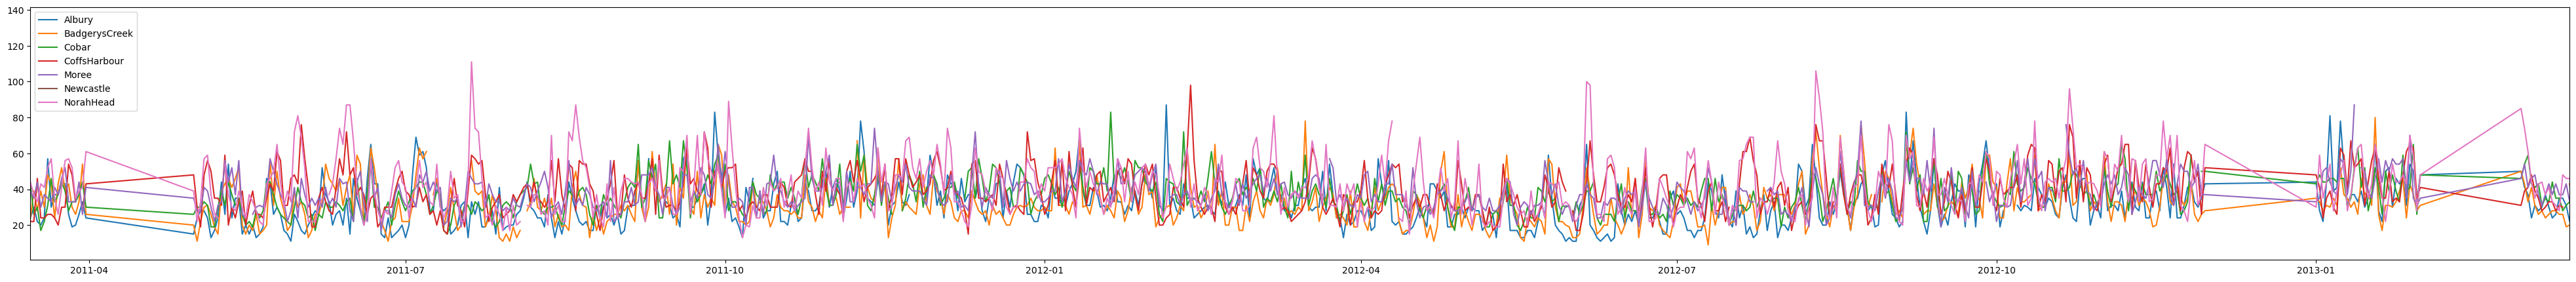

In [22]:
# Zoomons un peu:
import datetime


plt.figure(figsize = (50, 5))
for station in df['Location'].unique()[0:7]:
    plt.plot(df.loc[df['Location'] == station]['Date'], df.loc[df['Location'] == station]['WindGustSpeed'], label = station)
plt.legend()
xmin = datetime.datetime(2011, 3, 15)
xmax = datetime.datetime(2013, 3, 15)
plt.xlim([xmin, xmax])
plt.show()

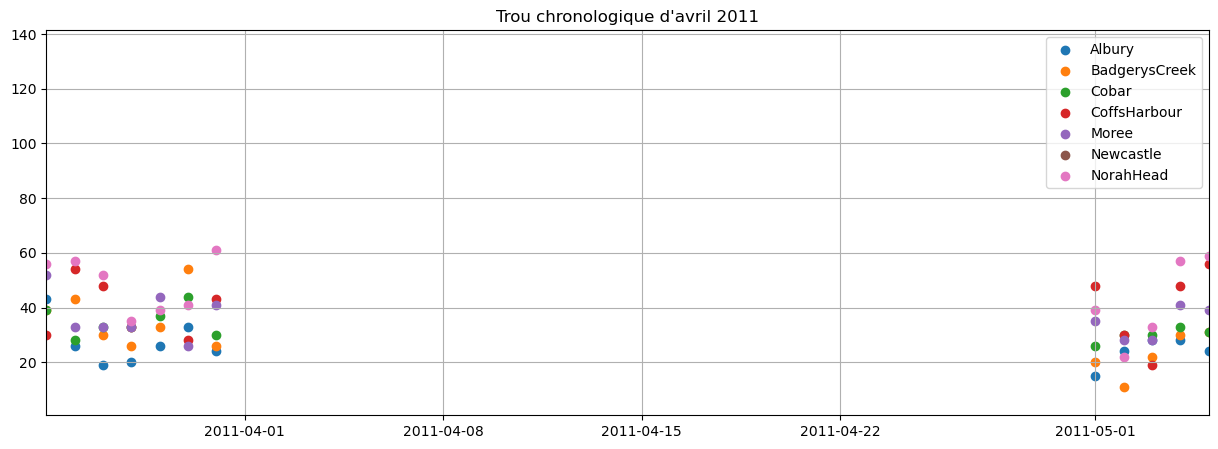

In [23]:
# (je ne fait plus qu'un seul graphique avec les 7 premières stations pour alléger la lecture)
# Première période : du 1er avril 2011 au 30 avril 2011.
# C'est tout le mois d'avril 2011 qui est concerné.

plt.figure(figsize = (15, 5))
for station in df['Location'].unique()[0:7]:
    plt.scatter(df.loc[df['Location'] == station]['Date'], df.loc[df['Location'] == station]['WindGustSpeed'], label = station)
plt.legend()
xmin = datetime.datetime(2011, 3, 25)
xmax = datetime.datetime(2011, 5, 5)
plt.xlim([xmin, xmax])
plt.grid()
plt.title("Trou chronologique d'avril 2011")
plt.show()

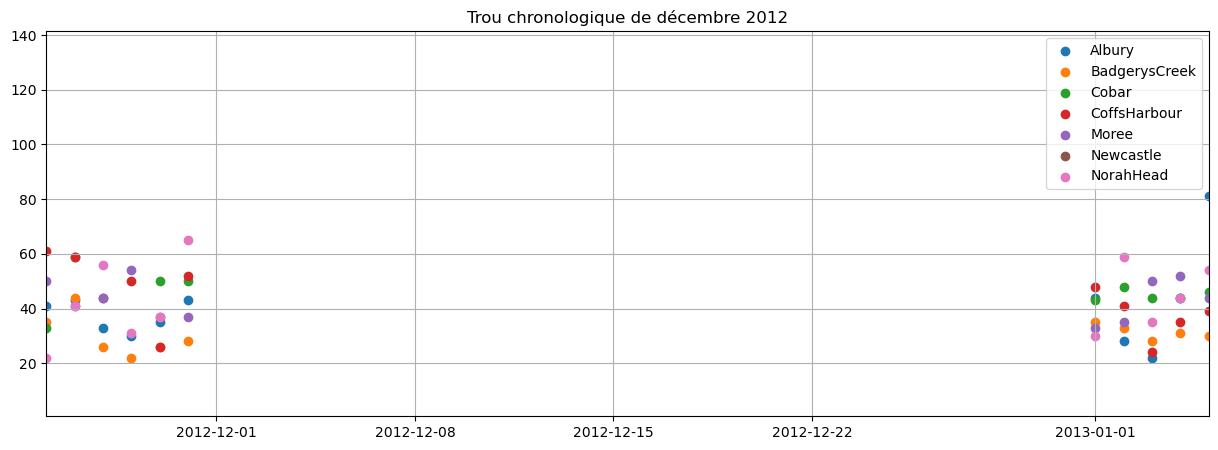

In [24]:
# Deuxième période : du 1er décembre 2012 au 31 décembre 2012
# C'est tout le mois de décembre 2012 qui est concerné.
plt.figure(figsize = (15, 5))
for station in df['Location'].unique()[0:7]:
    plt.scatter(df.loc[df['Location'] == station]['Date'], df.loc[df['Location'] == station]['WindGustSpeed'], label = station)
plt.legend()
xmin = datetime.datetime(2012, 11, 25)
xmax = datetime.datetime(2013, 1, 5)
plt.xlim([xmin, xmax])
plt.grid()
plt.title("Trou chronologique de décembre 2012")
plt.show()

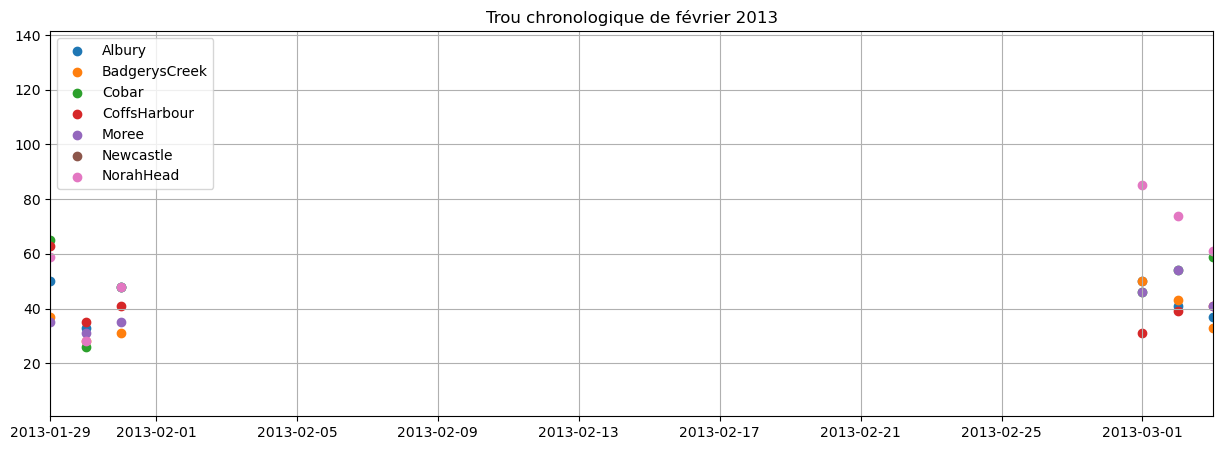

In [25]:
# Troisème période : du 1er février 2013 au 28 février 2013.
# C'est tout le mois de février 2013 qui est concerné.

plt.figure(figsize = (15, 5))
for station in df['Location'].unique()[0:7]:
    plt.scatter(df.loc[df['Location'] == station]['Date'], df.loc[df['Location'] == station]['WindGustSpeed'], label = station)
plt.legend()
xmin = datetime.datetime(2013, 1, 29)
xmax = datetime.datetime(2013, 3, 3)
plt.xlim([xmin, xmax])
plt.grid()
plt.title("Trou chronologique de février 2013")
plt.show()